In [9]:
# # #  # ! pip install seaborn
# ! conda install tensorflow -y

In [10]:
# ! conda install  certifi

#### Import required libraries 

In [320]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation


In [321]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 

#### Read the dataset 

In [322]:
# import data set from the local driver 
df=pd.read_csv('SWaT_Dataset_Attack_v0 - Copy.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp')
dff=pd.read_csv('SWaT_Dataset_Normal_v0.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp') 
frames = [df,dff] 
df_concat=pd.concat(frames) 
df_concat.head(2)  

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal


#### Automatic Sensor data extraction 

In [323]:
# # select sensor data 
# # filter_col = [col for col in df_concat if col.startswith('PIT' )]                                          
# # df[filter_col] 


# df_concat.filter(regex=('^PIT' and '^LIT') ,axis=1).head() 
df1=df_concat.filter(regex='(^PIT|^AIT|^FIT|^DPI|^LIT|^Norma)',axis=1)#.head()
df1.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
1,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal
2,2.489191,522.8467,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.4855,148.808,...,12.03538,1.723404,1.293967,0.735269,0.308619,250.8812,1.649953,189.6789,0.000128,Normal
3,2.534350,522.9645,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.8060,148.808,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.6148,0.000128,Normal
4,2.569260,523.4748,262.0161,8.394514,328.6337,2.443085,19.69076,2.208628,957.0864,148.808,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.5027,0.000128,Normal


In [324]:
#df1=df_concat.drop(['Timestamp','MV101','P101','P102', 'MV201', 'P201', 'P202','P203', 'P204','P205','P206','MV301','MV302','MV303','MV304','P301','P302','P401','P402','P403','P404','UV401','P501','P502','P601','P602','P603'],axis=1)#, inplace=True)  

#### Exploratory Data Analysis

In [325]:
#If there are missing entries, drop them.
df1.dropna(inplace=True)#,axis=1)  

/tmp/ipykernel_74/610384204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)#,axis=1)


In [326]:
# Total number of rows and columns 
df1.shape 


(946719, 26)

In [327]:
# Rows containing duplicate data 
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (17821, 26)


In [328]:
# Dropping the duplicates 
df1= df1.drop_duplicates()
df1.head(2)   

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
1,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal


In [329]:
# Counting the number of rows after removing duplicates.
df1.shape 


(928898, 26)

<AxesSubplot:>

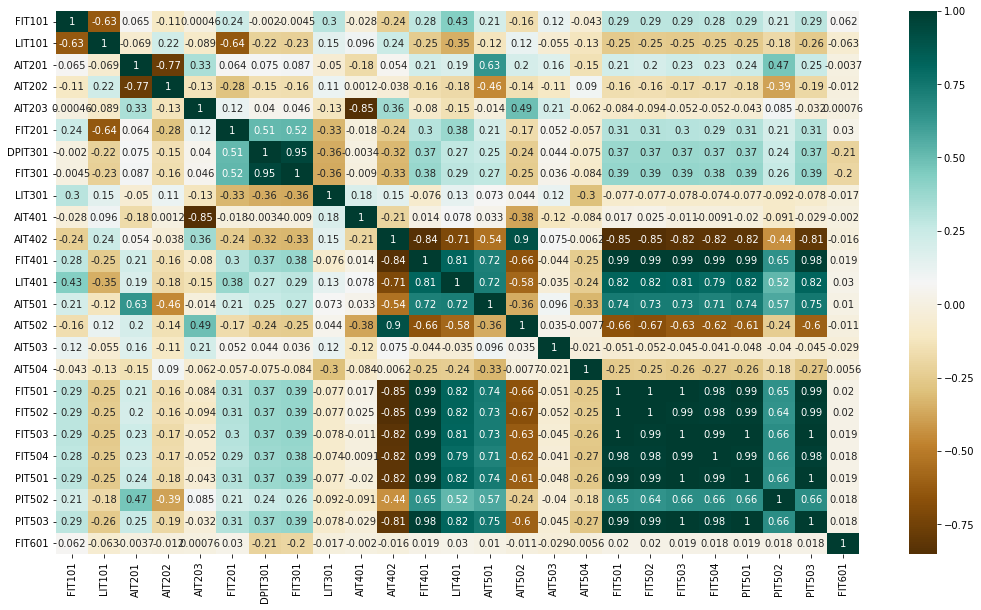

In [212]:
# Finding the relations between the variables. 
plt.figure(figsize=(18,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
#c  

In [213]:
# remove the space on Normal/Attack columns 
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')   

In [214]:
#To see how the data is spread betwen Attack and Normal 
print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 

Normal/Attack
Attack     53648
Normal    875250
Name: Normal/Attack, dtype: int64


In [215]:
# Rename the col name Normal/Attack with A   
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2) 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
1,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal


- As we can see,The data set is highly imbalanced. While this would be a challenge for typical classification systems, it is a natural application for outlier identification algorithms such as the Auto Encoder 

size of class 1 (outliers): 0, size of class 0: 0


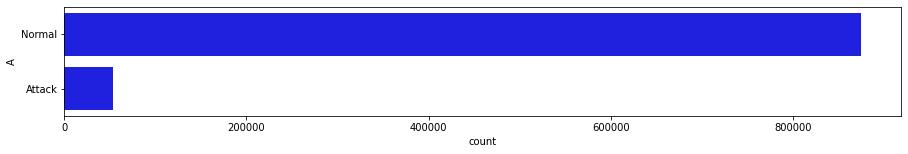

In [216]:
# Plot the balance of class labels
df_base = df1.copy()
nominal_count = len(df_base.loc[df1['A'] == 0, 'A'])
outlier_count = len(df_base.loc[df1['A'] == 1, 'A'])
print(f'size of class 1 (outliers): {outlier_count}, size of class 0: {nominal_count}')

plt.figure(figsize=(15,2))
fig = sns.countplot(y="A", data=df_base, color='b')

#### Visualize the dataset 
-  Plotting the number of normal and Attack transactions in the dataset.

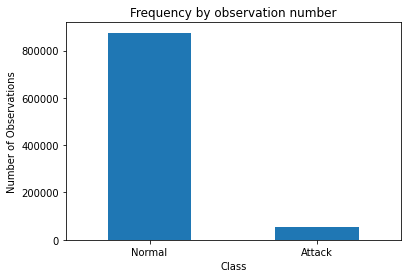

In [217]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1['A'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['A'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations"); 

- Visualizing the amount for normal and fraud transactions. 

In [218]:
# Convert non-numeric to numeric

df1.A[df1.A == 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1    

/tmp/ipykernel_74/455276947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Normal'] = 0
/tmp/ipykernel_74/455276947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Attack'] = 1


In [219]:
df1.head(2)

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,0
1,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,0


In [220]:
# count the number of anomalies and normal data points in our dataset 
df1['A'].value_counts()

0    875250
1     53648
Name: A, dtype: int64

#### Normalize using min Max scaler 

In [221]:
# # For content length, use the Min max Scalar.  
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
            'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
            'PIT501','PIT502','PIT503','FIT601'] 
scaler = MinMaxScaler() 
df1[con_feats] = scaler.fit_transform(df1[con_feats])
df1.head() 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,0.879322,0.457396,0.899417,0.801947,0.153462,0.865044,0.438853,0.928726,0.770793,0.999677,...,0.010781,0.980677,0.939528,0.962783,0.970903,0.946125,0.449782,0.944116,0.000071,0
1,0.886285,0.457440,0.899417,0.801947,0.153462,0.865044,0.438853,0.929319,0.770793,0.999677,...,0.010781,0.980677,0.952695,0.962783,0.970903,0.946125,0.449782,0.944521,0.000071,0
2,0.901833,0.457396,0.899417,0.801304,0.153462,0.863956,0.437572,0.929480,0.771093,0.999677,...,0.010781,0.980458,0.950061,0.962783,0.973530,0.946188,0.449782,0.944521,0.000071,0
3,0.918195,0.457530,0.899417,0.801304,0.153462,0.863956,0.437572,0.929480,0.771393,0.999677,...,0.010781,0.980458,0.940656,0.962783,0.973530,0.946188,0.449782,0.944197,0.000071,0
4,0.930842,0.458110,0.899417,0.801304,0.153462,0.864228,0.437572,0.929480,0.771655,0.999677,...,0.010781,0.980458,0.940656,0.962783,0.973530,0.946188,0.449782,0.943629,0.000071,0


#### Split the Data to train and Test

In [222]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(df1, test_size=0.2, random_state=42)   

In [318]:
# min max scale the input data or Standard Scaler  
x_good_train = x_good_train[x_good_train.A == 0] #where normal transactions 
x_good_train = x_good_train.drop(['A'], axis=1) #drop the class columns 

test_y = x_good_test['A'] # save the class column for the test set 
x_good_test = x_good_test.drop(['A'], axis=1) #drop the class column 

x_good_train = x_good_train.values #transform to ndarray 
x_good_test = x_good_test.values 
x_good_train.shape, x_good_test.shape#,x_good_train.shape,test_y.shape  

AttributeError: 'numpy.ndarray' object has no attribute 'A'

#### Build Model

In [224]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime 

#### Build model  
- Set the training parameter values 
   1. nb_epoch = 20 
   2. batch_size = 512 
   3. input_dim = normal_train_data.shape[1] #num of columns, 25 
   4. encoding_dim = 6 
   5. hidden_dim_1 = int(encoding_dim / 2) # 3
   6. hidden_dim_2= 2 
   7.Dropout  = 0.1 

In [294]:
model = Sequential()
# encoder 
model.add(Dense(64, input_dim=x_good_train.shape[1], activation='relu')) # Input layers 
Dropout(0.1), 
model.add(Dense(3, activation='relu'))
Dropout(0.1), 

model.add(Dense(64, activation='relu')) ## decoder 
Dropout(0.1), 
model.add(Dense(x_good_train.shape[1])) # output layers 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                1664      
                                                                 
 dense_45 (Dense)            (None, 3)                 195       
                                                                 
 dense_46 (Dense)            (None, 64)                256       
                                                                 
 dense_47 (Dense)            (None, 25)                1625      
                                                                 
Total params: 3,740
Trainable params: 3,740
Non-trainable params: 0
_________________________________________________________________


In [295]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train,x_good_train,
    verbose=1,
    epochs=50,
    batch_size=512,
    validation_data=(x_good_test, x_good_test), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0]) 
print('accuracy:', score[1]) 

Epoch 1/50
1368/1368 [==============================] - 8s 5ms/step - loss: 0.0720 - accuracy: 0.3597 - val_loss: 0.0521 - val_accuracy: 0.3994
Epoch 2/50
1368/1368 [==============================] - 7s 5ms/step - loss: 0.0466 - accuracy: 0.5989 - val_loss: 0.0392 - val_accuracy: 0.6952
Epoch 3/50
1368/1368 [==============================] - 6s 5ms/step - loss: 0.0389 - accuracy: 0.7831 - val_loss: 0.0388 - val_accuracy: 0.8069
Epoch 4/50
1368/1368 [==============================] - 7s 5ms/step - loss: 0.0387 - accuracy: 0.8188 - val_loss: 0.0387 - val_accuracy: 0.8241
Epoch 5/50
1368/1368 [==============================] - 6s 5ms/step - loss: 0.0387 - accuracy: 0.8262 - val_loss: 0.0387 - val_accuracy: 0.7479
Epoch 6/50
1368/1368 [==============================] - 6s 5ms/step - loss: 0.0386 - accuracy: 0.8169 - val_loss: 0.0389 - val_accuracy: 0.8020
Epoch 7/50
1368/1368 [==============================] - 6s 5ms/step - loss: 0.0385 - accuracy: 0.8266 - val_loss: 0.0390 - val_accuracy:

#### Plot training and test loss

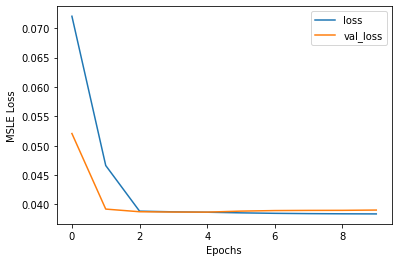

In [296]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()  

### Detect Anomalies on test data  
- Anomalies are data points where the reconstruction loss is higher 
- To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data. 

#### Predictions and Computing Reconstruction Error

In [297]:
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)  
error_df.describe()  

,Reconstruction_error
count,185780.000000
mean,2.206837
std,1.956473
min,0.289512
25%,1.208504
50%,1.406193
75%,3.273306
max,14.979052


(array([17763., 17522., 88009., 15237., 25132.,  3464.,  7484.,  2930.,
         3151.,  5088.]),
 array([0.21888033, 0.31568767, 0.41249501, 0.50930236, 0.6061097 ,
        0.70291704, 0.79972438, 0.89653173, 0.99333907, 1.09014641,
        1.18695375]),
 <BarContainer object of 10 artists>)

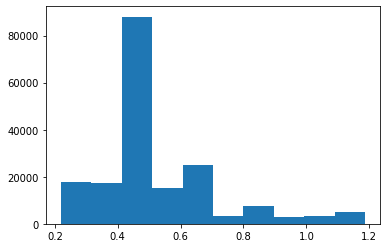

In [315]:
# This sample code is used to identify the thrshold values for anomalies and normal 
import tensorflow as tf 
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(test_x_predictions, x_good_test)

# Plotting histogram for recontruction loss for normal test data
plt.hist(train_loss, bins = 10) 

In [316]:
np.mean(train_loss)

0.517545561353812

In [317]:
np.std(train_loss)

0.19322168793017463

In [ ]:
# reconstruction loss for anomaly test data
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)

# Plotting histogram for recontruction loss for anomaly test data
plt.hist(train_loss_a, bins = 10) 

### Model Interpretability


In [298]:
# change X_tes_scaled to pandas dataframe
data_n = pd.DataFrame(x_good_test, index= test_y.index)#, columns=numerical_cols) 

In [299]:
def compute_error_per_dim(point):
    
    initial_pt = np.array(data_n.loc[point,:]).reshape(1,9)
    reconstrcuted_pt = model.predict(initial_pt)
    
    return abs(np.array(initial_pt - reconstrcuted_pt)[0]) 

In [310]:
outliers = error_df.index[error_df.Reconstruction_error >2].tolist()  
number_of_outliers = len(outliers) 

In [311]:
print("Number of elements in the anomalies: ", number_of_outliers)

Number of elements in the anomalies:  61557


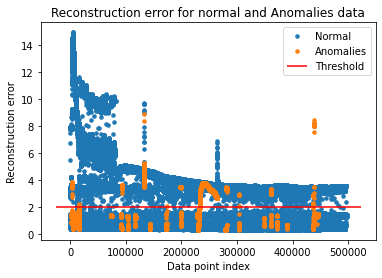

In [312]:
threshold_fixed = 2
groups = error_df.groupby('A')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalies" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and Anomalies data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index") 
plt.show();  

#### Calculate RMSE and MAE 

In [313]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('') 

The performance  of autoencoder:

Mean Absolute Error: 0.5175
Root Mean Square Error: 1.4855



#### Conclusion:

- As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.

- Things to further improve precision and recall would add more relevant features, different architecture for autoencoder, different hyperparameters, or a different algorithm. 

- Autoencoder can be used as an anomaly detection algorithm when we have an unbalanced dataset where we have a lot of good examples and only a few anomalies. Autoencoders are trained to minimize reconstruction error. When we train the autoencoders on normal data or good data, we can hypothesize that the anomalies will have higher reconstruction errors than the good or normal data. 